## Project Summary:

In this project I build a program that extracts images from a zipfile, extracts and parses the text from these images with pytesseract, and scans for any faces in photos within the same photos with opencv.

The main function of this code is:

It takes an input word from the user and then searches through the text in every image for a match. If a match is found in a certain image file, the program then crops any faces from photos within that same image and pastes and displays them on a new contact sheet.

### Import Libraries

In [278]:
import zipfile
import PIL
from PIL import Image
import pytesseract
import cv2 as cv
import numpy as np
import string

# loading the face detection classifier
face_cascade = cv.CascadeClassifier('haarcascade_frontalface_default.xml')


### Defining Functions

In [384]:
# Extract all files from a zipfile

def ExtractImages(zip_source):
    import zipfile
    zip_source.extractall()

# Identify words separated by Hyphen at end of sentence and reconnect them & remove all non-ascii chars
# except for '\n' 

def Clean_Symbols(word):
    ''' receives a string as an input and returns a string after clearing non-ascii and reconnecting words
    that were split by hyphen at end of sentence '''
    
    word = word.lower()
    if '-\n' in word:
        word = word.replace('-\n','')
    for ch in word:
        if ch in '",)':
            word = word.replace(ch,'')
        if '\n' in word:
            return word
        if ch not in string.ascii_lowercase and ch !='-':
            word = word.replace(ch,'')
    return(word)

# Cleans non-ascii, splits elements of list that contain two words separated by '\n' 
# and removes all empty string elements ('')

def Remove_Breaks_Empty(word_list):
    ''' takes a list of strings as input and returns a list of strings after clearing non-ascii, line breaks, and 
    empty strings'''
    
    clean_lst = []
    for word in word_list:
        clean_lst.append(Clean_Symbols(word))

    clean_lst2 = [element for item in clean_lst for element in item.split('\n')]
    clean_lst3 = [element for item in clean_lst2 for element in item.split('/')]

    clean_lst4 = list(filter(None, clean_lst3))
    return clean_lst4

# Search for a word within a text 

def Word_Search(word, text_list):
    ''' receives a keyword and list of strings as input, returns True if word exists in the list, otherwise
    returns False'''
    word1 = word.lower()
    for item in text_list:
        if (item == word1):
            print('The requested word: {} has been found!'.format(word))
            return True
    print('"{}" not found'.format(word))
    return False

# Receive an image as input and run pytesseract on it to extract text into a string. Then split and clean the text
# and finally return a list where each element represents a word from the original text

def Extract_Text_From_Image(img):
    text = pytesseract.image_to_string(img)
    text_lst = text.split(' ')
    text_lst2 = Remove_Breaks_Empty(text_lst)
    return text_lst2

# Input a list of image filenames. Iterate over the files and extract the text from each into a separate list within 
# a returned list of texts.

def get_images_texts(image_name_list):
    All_texts = []
    for name in Archive.namelist():
        img = Image.open(name)
        img = img.convert('L')
        text_lst = Extract_Text_From_Image(img)
        All_texts.append(text_lst)
    return All_texts

# Function gets img and faces and returns a contact sheet with all faces found on the img

def crop_and_paste(filename, faces):   
    if len(faces)<1:
        print("But no faces were found!")
        return None
    img = Image.open(filename)
    imagelist = []
    basewidth = 200
    for i in range(len(faces)):
        new_img = img.crop((faces[i][0], faces[i][1], (faces[i][0] + faces[i][2]), (faces[i][1] + faces[i][3])))
        #print(" new image {} size: {}".format(i, new_img.size))
        wpercent = (basewidth/float(new_img.size[0]))
        hsize = int((float(new_img.size[1])*float(wpercent)))
        new_img = new_img.resize((basewidth,hsize), Image.ANTIALIAS)
        imagelist.append(new_img)
    
    first_image = imagelist[0]
    contact_sheet = PIL.Image.new(first_image.mode, (first_image.width*(len(imagelist))*2, first_image.height*2))
    x1 = 0
    y1 = 0
    for img in imagelist:
        contact_sheet.paste(img, (x1, y1))
        if x1 + first_image.width == contact_sheet.width:
            x1=0
            y1=y1 + first_image.height
        else:
            x1=x1 + first_image.width
    return contact_sheet

# Get image filename as input and return faces ndarray

def get_faces(filename):
    img = cv.imread(filename)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(40,40))
    return faces

# get faces ndarray as input and display image with drawn rectangles around identified faces

def show_rects(faces,filename):
    img = cv.imread(filename)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    pil_img=Image.fromarray(gray)  # Create a PIL image object
    from PIL import ImageDraw # import our drawing object library
    drawing=ImageDraw.Draw(pil_img) # Create our drawing object

    for x,y,w,h in faces:
        drawing.rectangle((x,y,x+w,y+h), outline="blue")

    display(pil_img)
    




### Main program

In [368]:
# Extract all image files from a zipfile into our working directory

Archive = zipfile.PyZipFile("images.zip")
print(Archive.namelist())
ExtractImages(Archive)

['a-0.png', 'a-1.png', 'a-10.png', 'a-11.png', 'a-12.png', 'a-13.png', 'a-2.png', 'a-3.png', 'a-4.png', 'a-5.png', 'a-6.png', 'a-7.png', 'a-8.png', 'a-9.png']


In [369]:
# Extract text from each image file into a list item after cleaning it and splitting it into a list of words

all_texts = get_images_texts(Archive)
print(len(all_texts))

14


In [378]:
# Create a list of dictionaries, each with keys 'name' (filename) and 'text_file' (list of words from the file)
d = {}
data_matrix = []
for name in Archive.namelist():
    d['name']= name
    data_matrix.append(d.copy())
    


count = 0
for dict in data_matrix:
    dict['text_list'] = all_texts[count]
    count += 1

print(len(data_matrix))



14


Please enter search keyword: Mark
a-0.png
The requested word: Mark has been found!


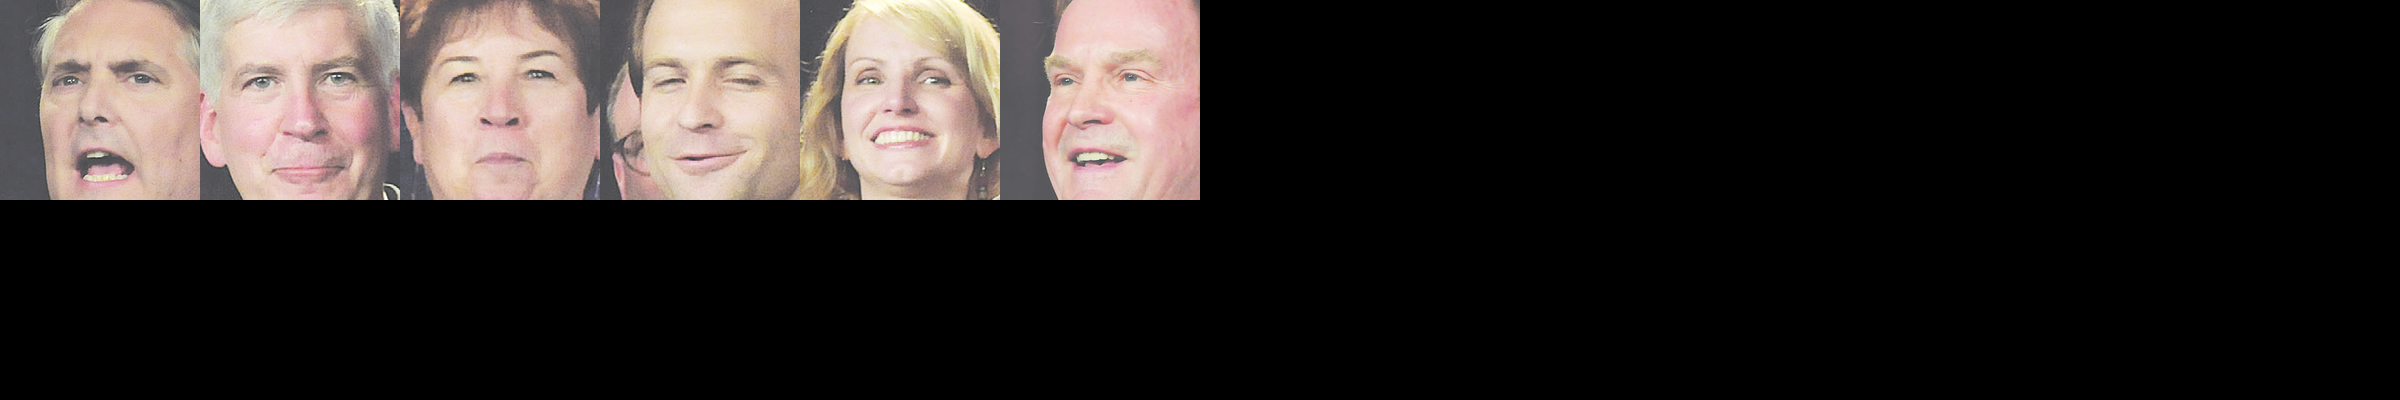

a-1.png
The requested word: Mark has been found!


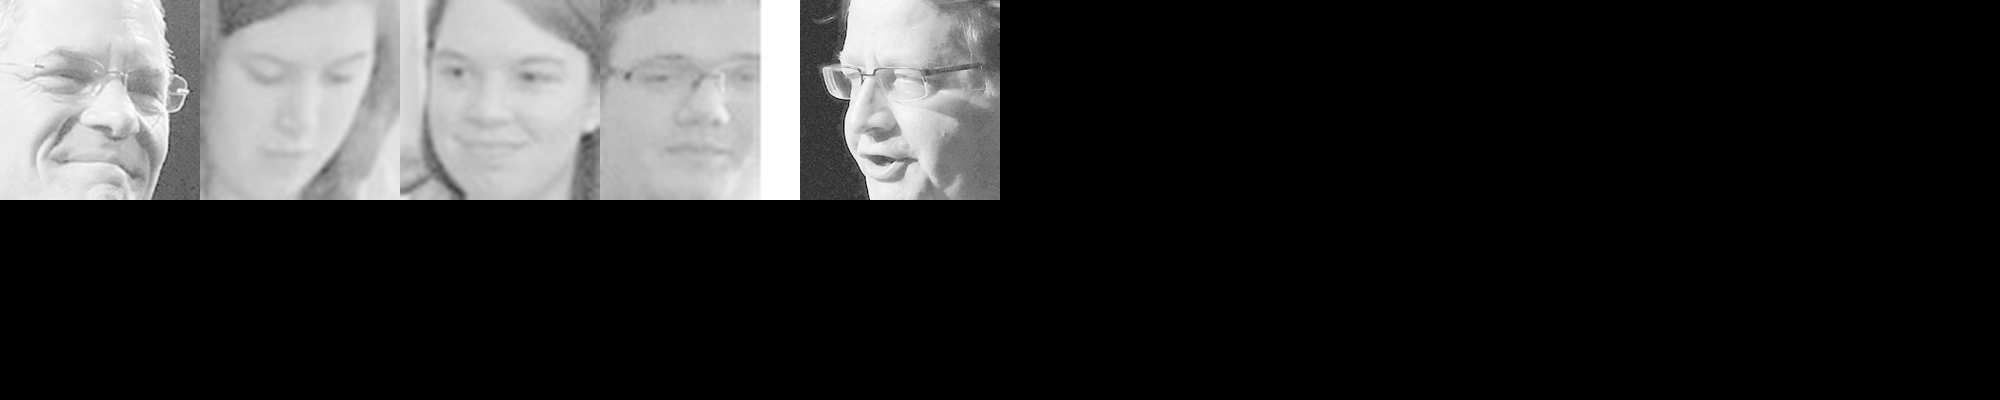

a-10.png
The requested word: Mark has been found!
But no faces were found!


None

a-11.png
"Mark" not found
a-12.png
"Mark" not found
a-13.png
"Mark" not found
a-2.png
The requested word: Mark has been found!


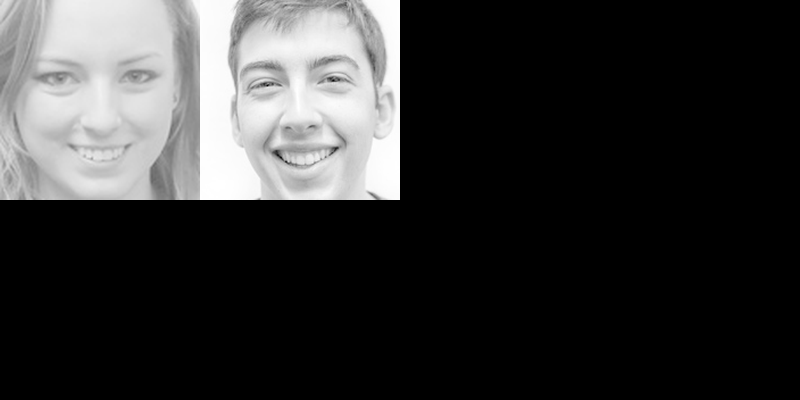

a-3.png
The requested word: Mark has been found!


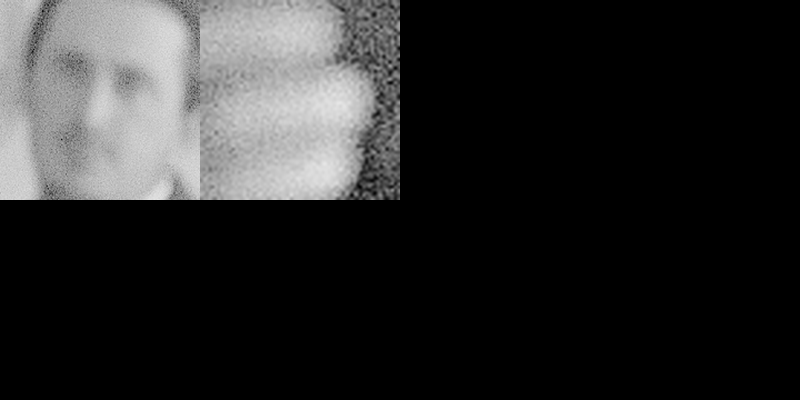

a-4.png
"Mark" not found
a-5.png
The requested word: Mark has been found!


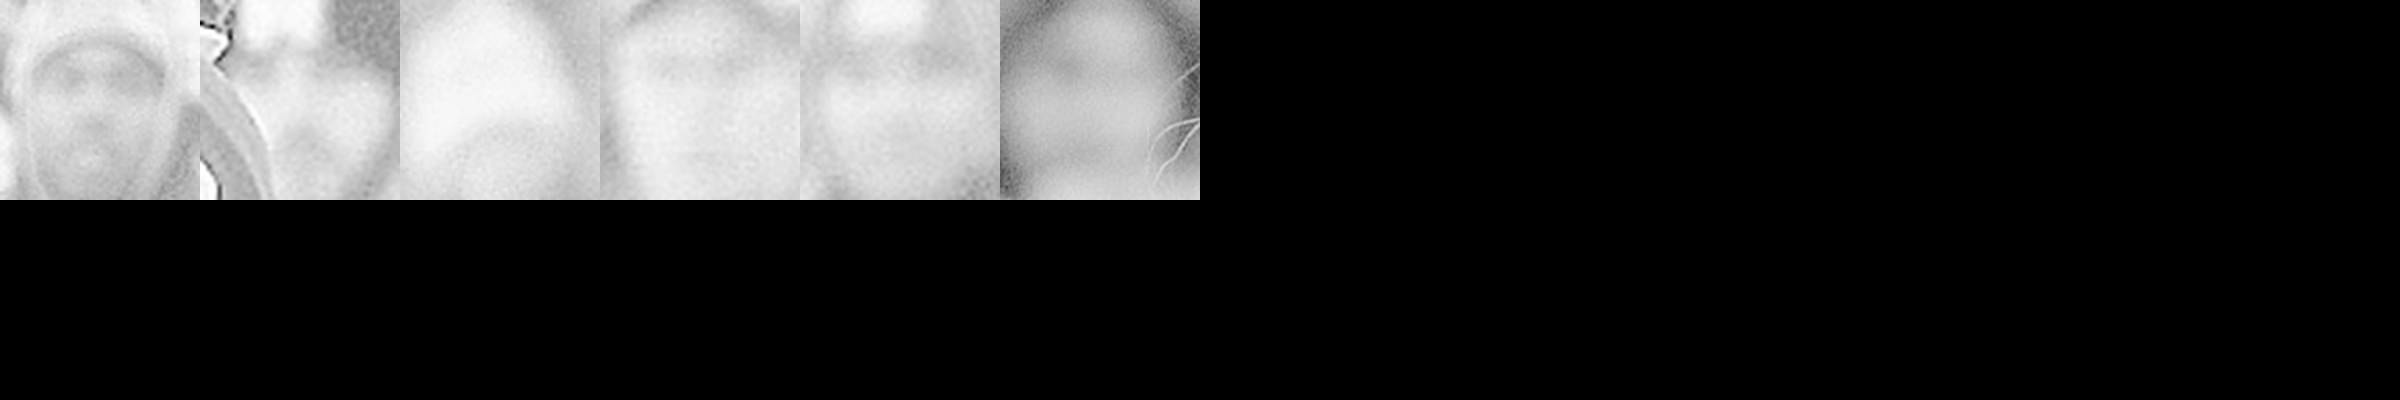

a-6.png
"Mark" not found
a-7.png
"Mark" not found
a-8.png
The requested word: Mark has been found!
But no faces were found!


None

a-9.png
The requested word: Mark has been found!


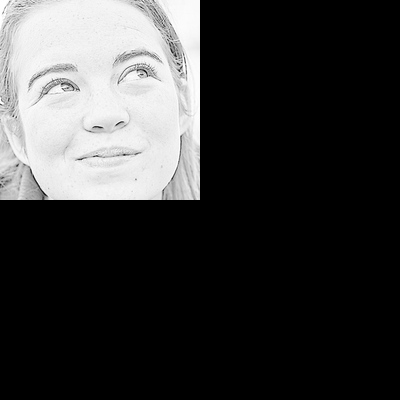

In [386]:
# Run the main program - Take an input word from the user and search for this word in image files. If the word is 
# found in an image, extract all faces from the same image and display them on a contact sheet.

word = input('Please enter search keyword: ')
for dict in data_matrix:
    print(dict['name'])
    if Word_Search(word, dict['text_list']) == True:
        faces = get_faces(dict['name'])
        contact_sheet = crop_and_paste(dict['name'], faces)
        display(contact_sheet)